In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [90]:


file_path = "/content/carclaims.csv"
df = pd.read_csv(file_path)

# Convert FraudFound to numeric (1 for fraud, 0 for no fraud)
df["FraudFound"] = df["FraudFound"].map({"Yes": 1, "No": 0})

In [91]:
df["VehiclePrice"].unique()

array(['more than 69,000', '20,000 to 29,000', '30,000 to 39,000',
       'less than 20,000', '40,000 to 59,000', '60,000 to 69,000'],
      dtype=object)

In [92]:
vehicle_price_mapping = {
    'less than 20,000': 15000,
    '20,000 to 29,000': 25000,
    '30,000 to 39,000': 35000,
    '40,000 to 59,000': 50000,
    '60,000 to 69,000': 65000,
    'more than 69,000': 70000
}

# Map VehiclePrice to numeric
df['VehiclePrice'] = df['VehiclePrice'].map(vehicle_price_mapping)

In [93]:


# Select features to scale
features_to_scale = ["Age", "DriverRating", "VehiclePrice", "PastNumberOfClaims", "AddressChange-Claim", "Fault"]

# Apply Z-Score Scaling (Standardization)
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale].apply(pd.to_numeric, errors='coerce'))

# Ensure categorical variables are encoded for visualization
df_scaled["PolicyType"] = df["PolicyType"].astype("category").cat.codes
df_scaled["PoliceReportFiled"] = df["PoliceReportFiled"].astype("category").cat.codes
df_scaled["WitnessPresent"] = df["WitnessPresent"].astype("category").cat.codes
df_scaled["AccidentArea"] = df["AccidentArea"].astype("category").cat.codes
df_scaled["AgentType"] = df["AgentType"].astype("category").cat.codes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


filing a police report appears correlated with a much greater spread in observed fraud likelihood

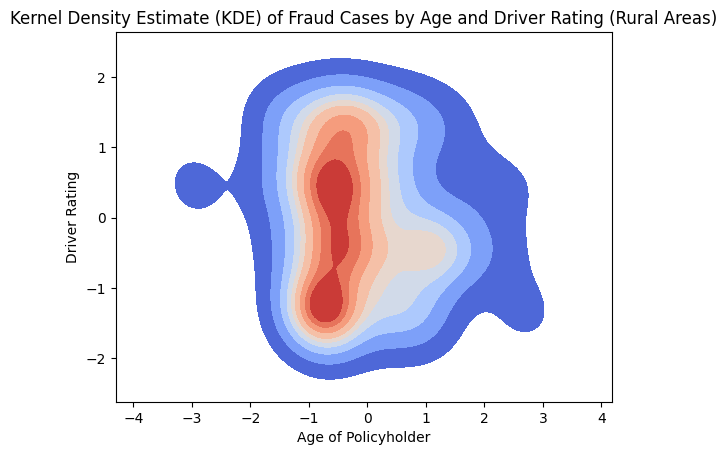

Text(0, 0.5, 'Driver Rating')

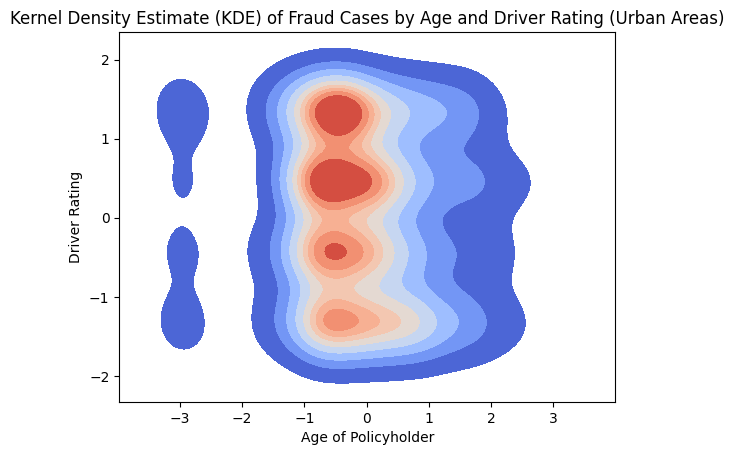

In [94]:
# Filter only fraud cases in rural areas
fraud_cases_rural = df_scaled[(df_scaled["FraudFound"] == 1) & (df["AccidentArea"] == "Rural")]

# KDE plot showing the relationship between Age and Driver Rating for fraud cases in rural areas
sns.kdeplot(data=fraud_cases_rural, x="Age", y="DriverRating", fill=True, cmap="coolwarm", thresh=0.05)

# Labels and title
plt.title("Kernel Density Estimate (KDE) of Fraud Cases by Age and Driver Rating (Rural Areas)")
plt.xlabel("Age of Policyholder")
plt.ylabel("Driver Rating")

# Show the plot
plt.show()

# Filter only fraud cases in urban areas
fraud_cases_rural = df_scaled[(df_scaled["FraudFound"] == 1) & (df["AccidentArea"] == "Urban")]

# KDE plot showing the relationship between Age and Driver Rating for fraud cases in rural areas
sns.kdeplot(data=fraud_cases_rural, x="Age", y="DriverRating", fill=True, cmap="coolwarm", thresh=0.05)

# Labels and title
plt.title("Kernel Density Estimate (KDE) of Fraud Cases by Age and Driver Rating (Urban Areas)")
plt.xlabel("Age of Policyholder")
plt.ylabel("Driver Rating")




a higher portion of rural fraud cases appear among younger drivers with poorer ratings.

some fraud cases are found for older drivers and/or better driver ratings, but those areas have lighter contours (less frequent).

there is a dense cluster of fraud activity for relatively younger‐than‐average drivers with moderately varying driver ratings

There are two or three smaller blobs far left (x ≤ −3), indicating a secondary group of very young policyholders (well below the mean age) who file fraudulent claims with driver ratings spread from around −1 up to +1. Although smaller than the main group, these clusters show that extremely young urban drivers are also fraud‐prone.

Fraud is most common among drivers with mid‐range ratings, rather than exclusively “bad” or “good” ratings.

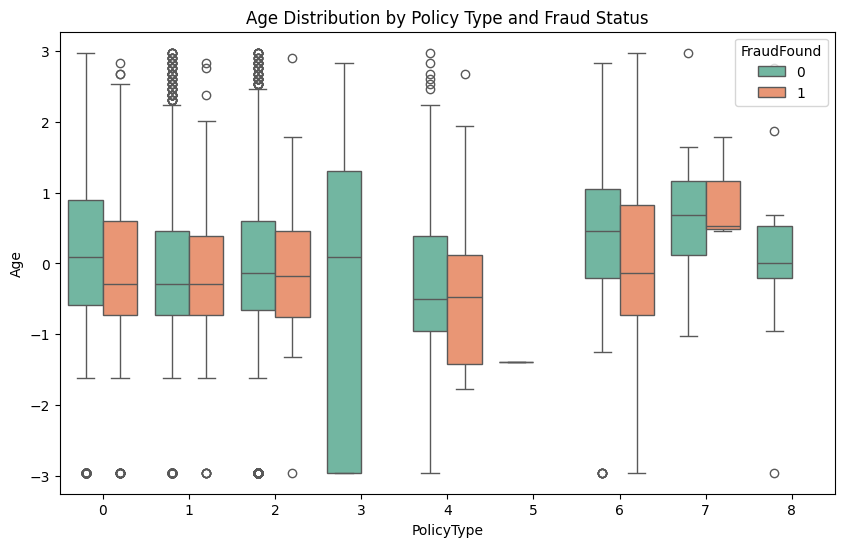

In [95]:
# Box Plot of Age Distribution for Fraudulent and Non-Fraudulent Claims, grouped by Policy Type
plt.figure(figsize=(10, 6))
sns.boxplot(x="PolicyType", y="Age", hue="FraudFound", data=df_scaled, palette="Set2")
plt.title("Age Distribution by Policy Type and Fraud Status")
plt.show()


In many policy types (e.g. 0, 1, 2, 3, 4), the orange (fraud) boxes are shifted slightly downward (i.e. to younger ages) relative to the green boxes (non‐fraud). This suggests that, for those policy types, fraudulent cases might come from somewhat younger‐than‐average

Some policy types (type 3) show a wide age range in the non‐fraud group, indicating more diversity in that group’s age.

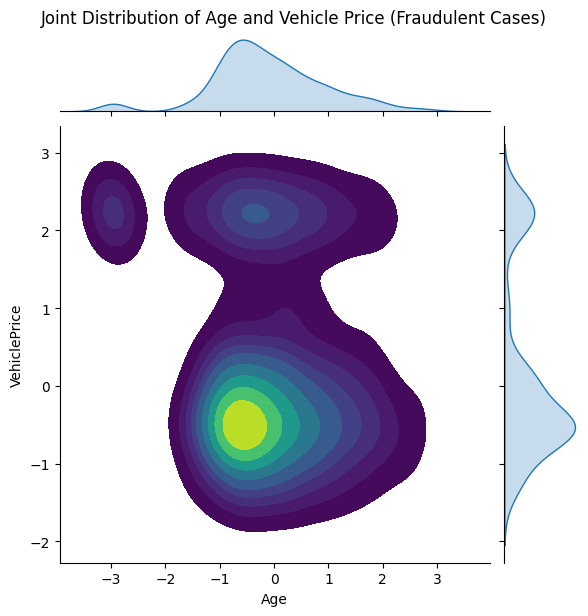

In [96]:

# Jointplot to show the relationship between two features with marginal distributions
sns.jointplot(x="Age", y="VehiclePrice", data=df_scaled[df_scaled["FraudFound"] == 1], kind="kde", fill=True, cmap="viridis")
plt.suptitle("Joint Distribution of Age and Vehicle Price (Fraudulent Cases)", y=1.02)
plt.show()



A large portion of fraudulent claims seem to come from individuals with about-average age and below-average vehicle prices (the bright density region at
(
0
,
−
1
)
(0,−1)).
Another “hotspot” corresponds to younger-than-average age (Age around -1) with above-average vehicle prices (VehiclePrice around 2).
A smaller group clusters at quite young ages (Age around -2.5) but closer to an average vehicle price.

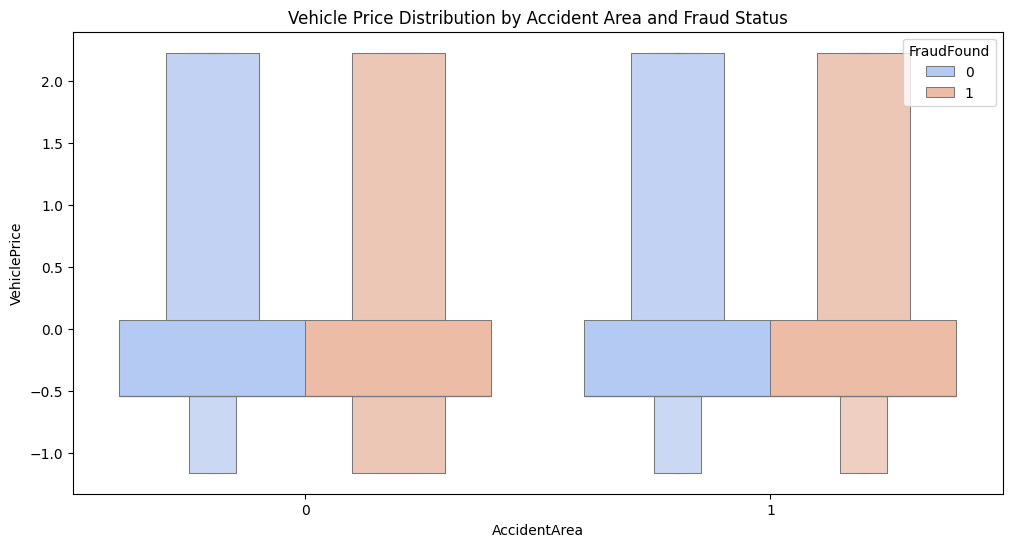

In [97]:

# Boxenplot for VehiclePrice, grouped by FraudFound and AccidentArea
plt.figure(figsize=(12, 6))
sns.boxenplot(x="AccidentArea", y="VehiclePrice", hue="FraudFound", data=df_scaled, palette="coolwarm")
plt.title("Vehicle Price Distribution by Accident Area and Fraud Status")
plt.show()

Within each area (left vs. right grouping), the orange section (fraud) appears centered a bit lower (closer to or just below zero) than the blue (non‐fraud) section (centered around zero or slightly above). This suggests that on average, fraud cases might involve vehicles priced somewhat below the mean

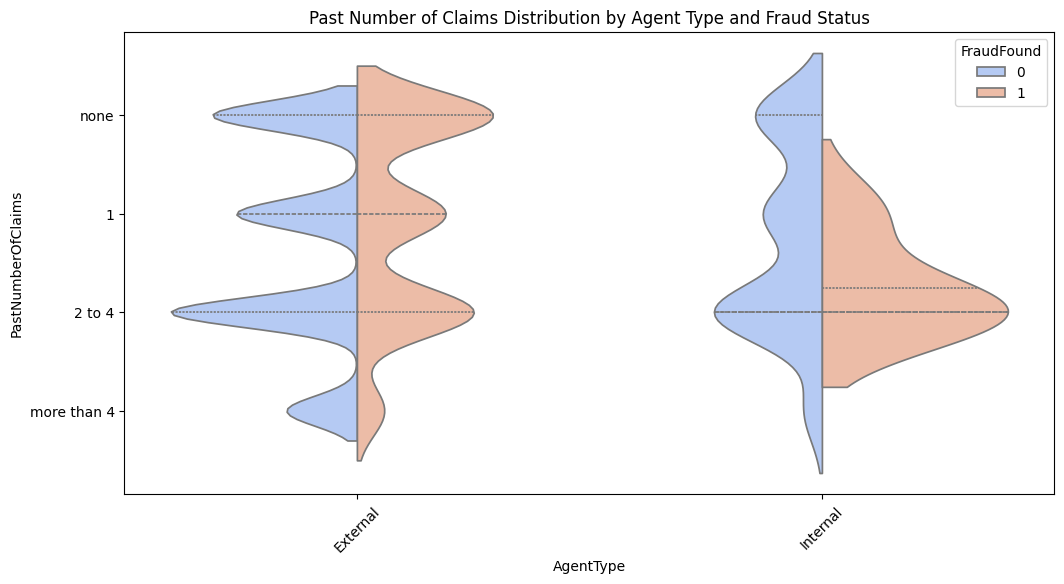

In [98]:
# Violin plot of Past Number of Claims vs. Fraud, grouped by Agent Type
plt.figure(figsize=(12, 6))
sns.violinplot(x="AgentType", y="PastNumberOfClaims", hue="FraudFound", data=df, split=True, inner="quartile", palette="coolwarm")
plt.title("Past Number of Claims Distribution by Agent Type and Fraud Status")
plt.xticks(rotation=45)
plt.show()

In the External panel, the fraud distribution (orange) is a bit larger in the “none” and “1” segments than the non‐fraud (blue) suggests; meanwhile, the blue half is more pronounced around “2 to 4.” This implies that, among customers served by external agents, those with fewer (or zero) prior claims might be relatively more likely to turn out fraudulent

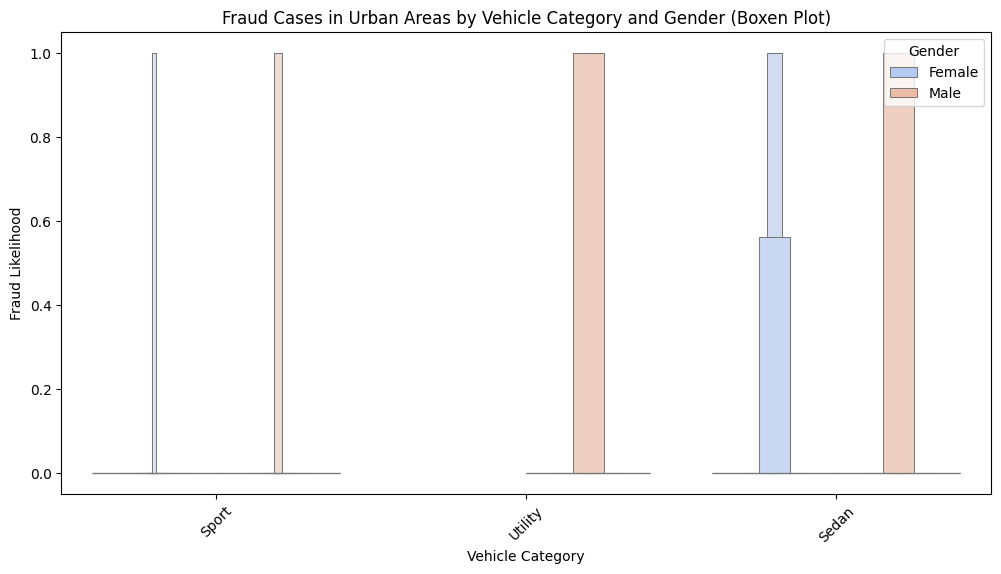

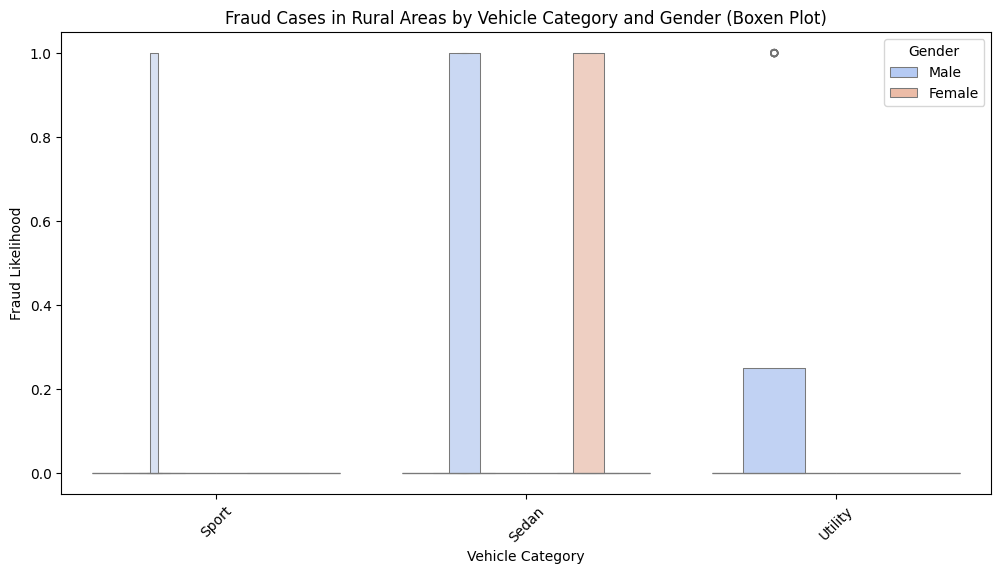

In [99]:
# Using a boxen plot to visualize fraudulent claims in urban areas across vehicle categories and gender
plt.figure(figsize=(12, 6))
sns.boxenplot(x="VehicleCategory", y="FraudFound", hue="Sex", data=df[df["AccidentArea"] == "Urban"],
              palette="coolwarm")

# Labels and title
plt.title("Fraud Cases in Urban Areas by Vehicle Category and Gender (Boxen Plot)")
plt.xlabel("Vehicle Category")
plt.ylabel("Fraud Likelihood")
plt.legend(title="Gender")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Using a boxen plot to visualize fraudulent claims in rural areas across vehicle categories and gender
plt.figure(figsize=(12, 6))
sns.boxenplot(x="VehicleCategory", y="FraudFound", hue="Sex", data=df[df["AccidentArea"] == "Rural"],
              palette="coolwarm")

# Labels and title
plt.title("Fraud Cases in Rural Areas by Vehicle Category and Gender (Boxen Plot)")
plt.xlabel("Vehicle Category")
plt.ylabel("Fraud Likelihood")
plt.legend(title="Gender")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

For Utility and Sedan categories in urban areas, male drivers show the broadest (and generally higher) range of fraud likelihoods, whereas female distributions often cluster closer to 0, though there are still a few high‐likelihood outliers.

Sport vehicles are heavily concentrated at near‐zero fraud likelihood for both genders, suggesting relatively fewer strongly suspicious claims among urban sport‐vehicle owners overall.

vehicle category–gender combination appears to influence the spread of fraud likelihoods, especially for Utility and Sedan drivers.

<Figure size 1400x600 with 0 Axes>

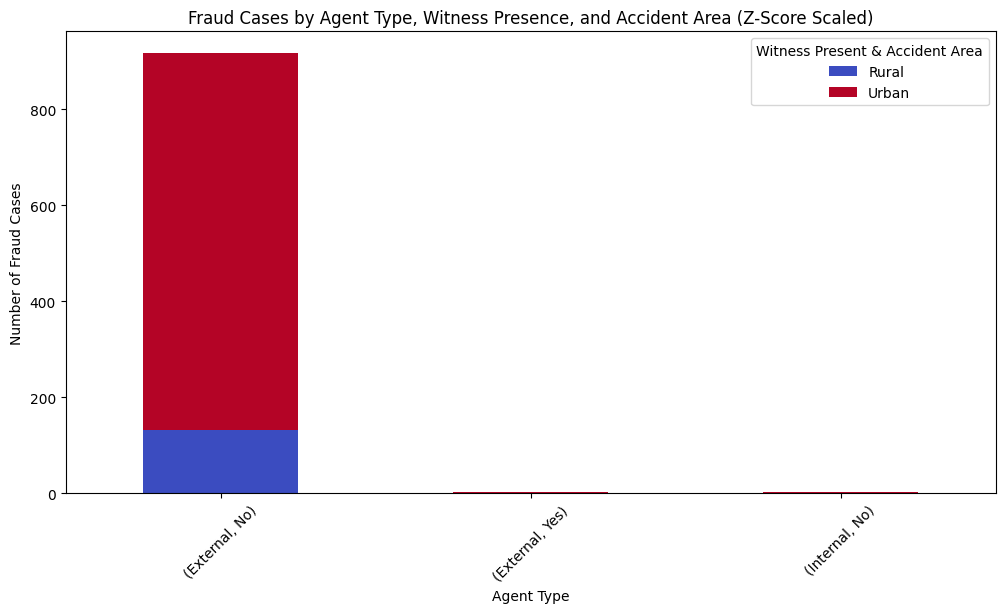

In [100]:
# Fraud Cases by Agent Type, Witness Presence, and Accident Area (Stacked Bar Plot)
plt.figure(figsize=(14, 6))

# Group by Agent Type, Witness Presence, and Accident Area for fraud cases
fraud_categorical_counts = df[df["FraudFound"] == 1].groupby(["AgentType", "WitnessPresent", "AccidentArea"]).size().unstack()

# Create a stacked bar plot
fraud_categorical_counts.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(12, 6))

# Labels and title
plt.title("Fraud Cases by Agent Type, Witness Presence, and Accident Area (Z-Score Scaled)")
plt.xlabel("Agent Type")
plt.ylabel("Number of Fraud Cases")
plt.legend(title="Witness Present & Accident Area")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()